In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

This project is about data

In [2]:
majors = pd.read_csv('college-majors/all-ages.csv')
majors.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [3]:
stem_women = pd.read_csv('college-majors/women-stem.csv')
stem_women.head()

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


In [4]:
stem = ['Engineering', 'Physical Sciences', 'Computers & Mathematics', 'Health', 'Biology & Life Science']

majors_stem = majors[majors['Major_category'].isin(stem)]

<AxesSubplot:>

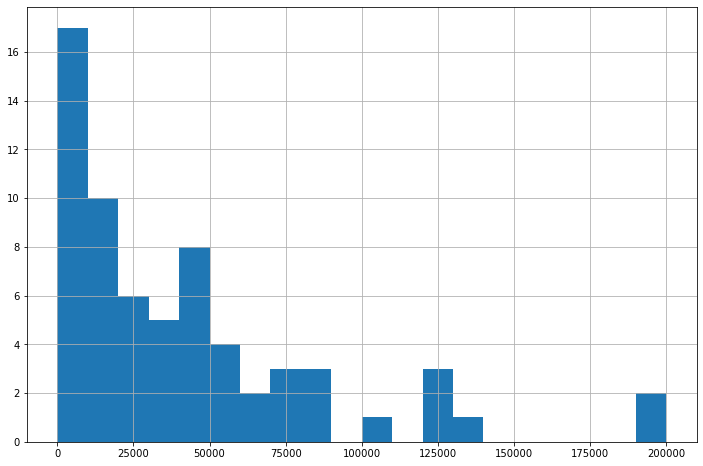

In [5]:
majors_stem['Employed'].hist(bins=20, range=(0,200000), figsize=(12,8))

<AxesSubplot:>

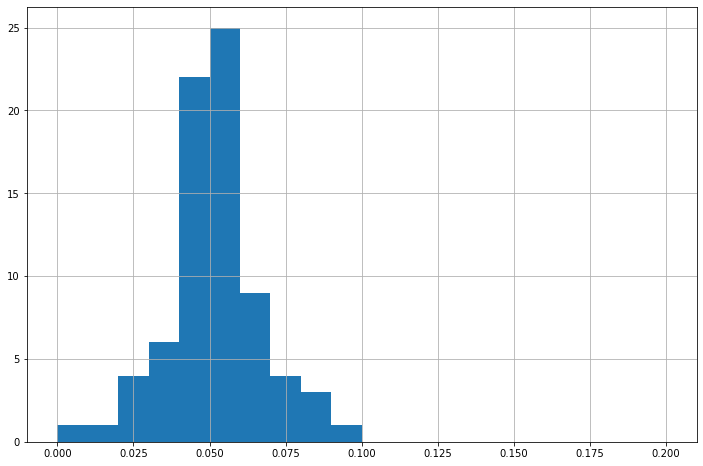

In [6]:
majors_stem['Unemployment_rate'].hist(bins=20, range=(0,0.2), figsize=(12,8))

<AxesSubplot:>

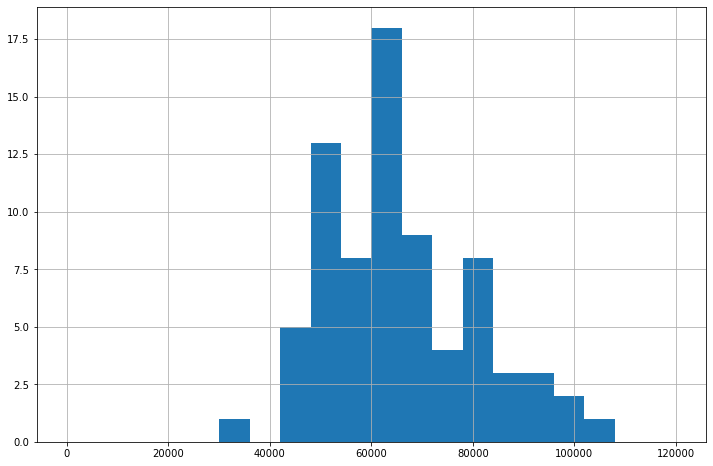

In [7]:
majors_stem['Median'].hist(bins=20, range=(0, 120000), figsize=(12,8))

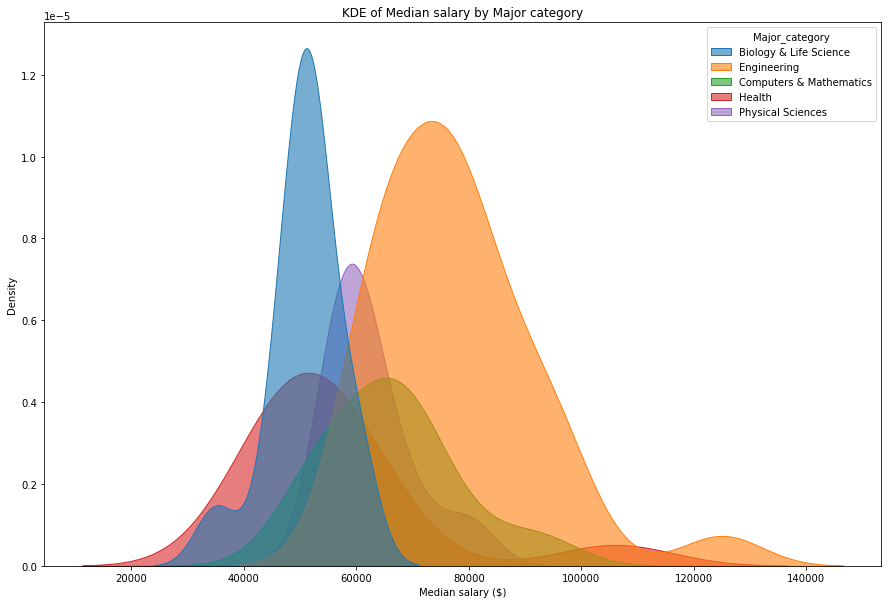

In [8]:
plt.figure(figsize=(15,10))

# Create kde plot and its components 
kde_plot = sns.kdeplot(x = "Median", data = majors_stem, fill = True, alpha = .6, hue = "Major_category", legend = True)
kde_plot.set_title("KDE of Median salary by Major category")
kde_plot.set_xlabel("Median salary ($)")

# Show
plt.show()

<AxesSubplot:xlabel='Median', ylabel='Major_category'>

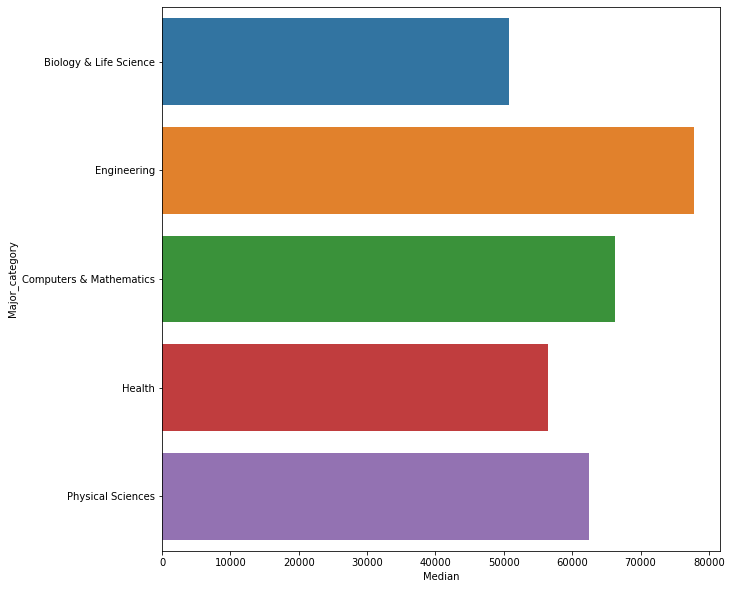

In [9]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'Median', y = 'Major_category', data = majors_stem, orient = 'h', ci = None)

<AxesSubplot:xlabel='Median', ylabel='Major_category'>

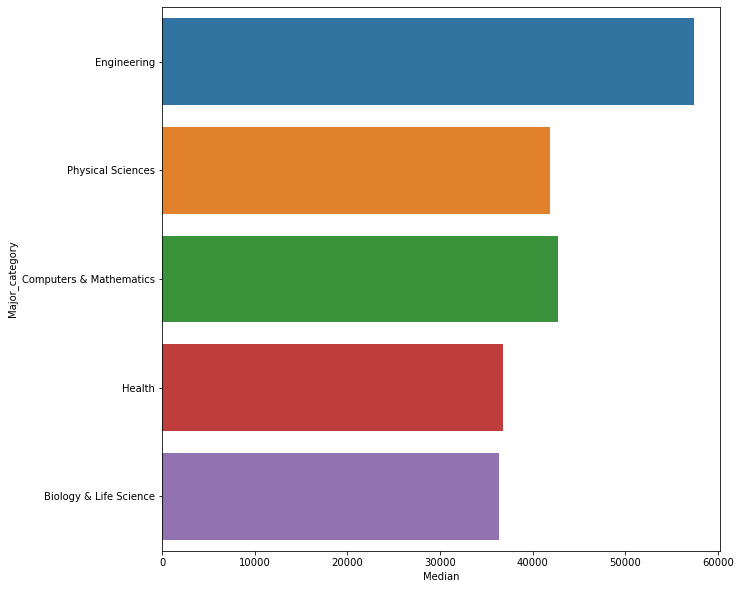

In [10]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'Median', y = 'Major_category', data = stem_women, orient = 'h', ci = None)

<AxesSubplot:xlabel='P75th', ylabel='Major_category'>

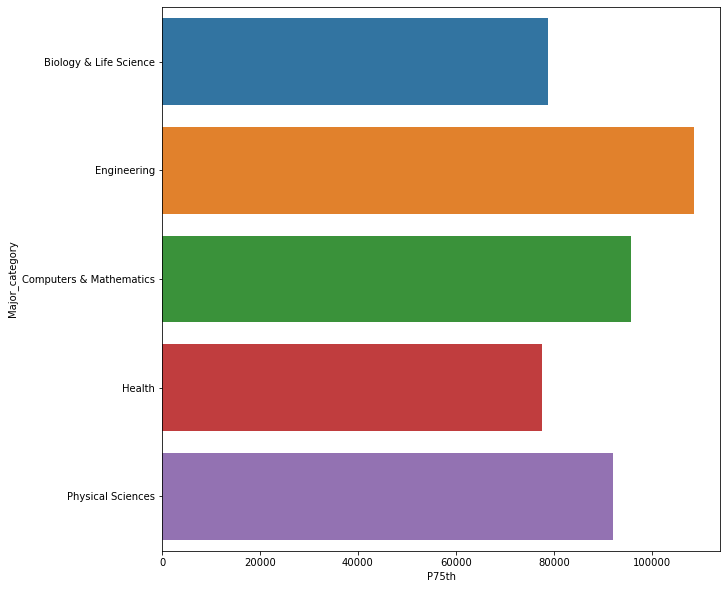

In [11]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'P75th', y = 'Major_category', data = majors_stem, orient = 'h', ci = None)

In [12]:
majors_health = majors_stem[majors_stem['Major_category'] == 'Health']

majors_health.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
96,4002,NUTRITION SCIENCES,Health,64534,43878,28112,2961,0.063217,49500,34000,69000.0
147,6100,GENERAL MEDICAL AND HEALTH SERVICES,Health,104516,78198,53746,4525,0.054701,50000,35000,73000.0
148,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,74977,49393,26085,2407,0.046467,42000,30000,60000.0
149,6103,HEALTH AND MEDICAL ADMINISTRATIVE SERVICES,Health,108510,85360,67294,5160,0.057004,50000,35000,75000.0
150,6104,MEDICAL ASSISTING SERVICES,Health,64316,51279,25118,1660,0.031357,55000,37000,75000.0


<AxesSubplot:xlabel='Median', ylabel='Major'>

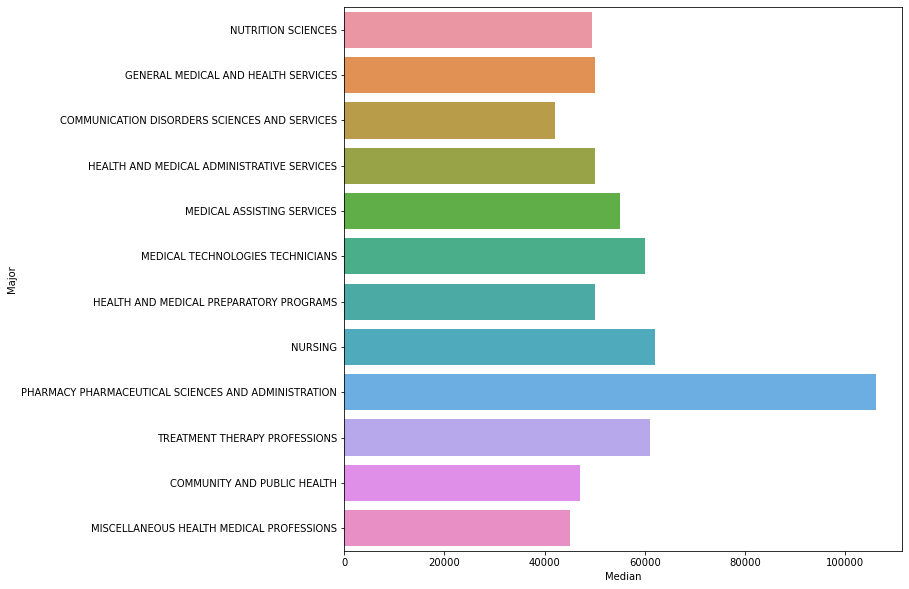

In [13]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'Median', y = 'Major', data = majors_health, orient = 'h', ci = None)

In [14]:
grad_df = pd.read_csv('college-majors/grad-students.csv')
grad_stem_df = grad_df[grad_df['Major_category'].isin(stem)]
grad_stem_df.head()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154
8,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,5611,98,4716,3981,119,0.024612,85000.0,...,28314,22024,18381,2222,0.091644,60000.0,40000,85000.0,0.165394,0.416667
12,2504,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,Engineering,6065,111,4442,3669,310,0.065236,78000.0,...,27999,23069,20418,998,0.041468,61000.0,42000,85000.0,0.178047,0.278689
15,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,Computers & Mathematics,11165,218,9037,7988,803,0.081606,80000.0,...,48776,41552,34402,2476,0.056237,58000.0,37700,84000.0,0.186266,0.379310
17,2599,MISCELLANEOUS ENGINEERING TECHNOLOGIES,Engineering,14816,315,12433,11146,407,0.031698,80000.0,...,60571,50092,44199,3316,0.062088,65000.0,43000,90000.0,0.196533,0.230769


In [15]:
grad_stem_df['Diff_median'] = grad_stem_df['Grad_median'] - grad_stem_df['Nongrad_median']
grad_df['Diff_median'] = grad_df['Grad_median'] - grad_df['Nongrad_median']

C:\Users\Beger\AppData\Local\Temp/ipykernel_4276/3615149571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grad_stem_df['Diff_median'] = grad_stem_df['Grad_median'] - grad_stem_df['Nongrad_median']


<AxesSubplot:xlabel='Grad_median', ylabel='Major_category'>

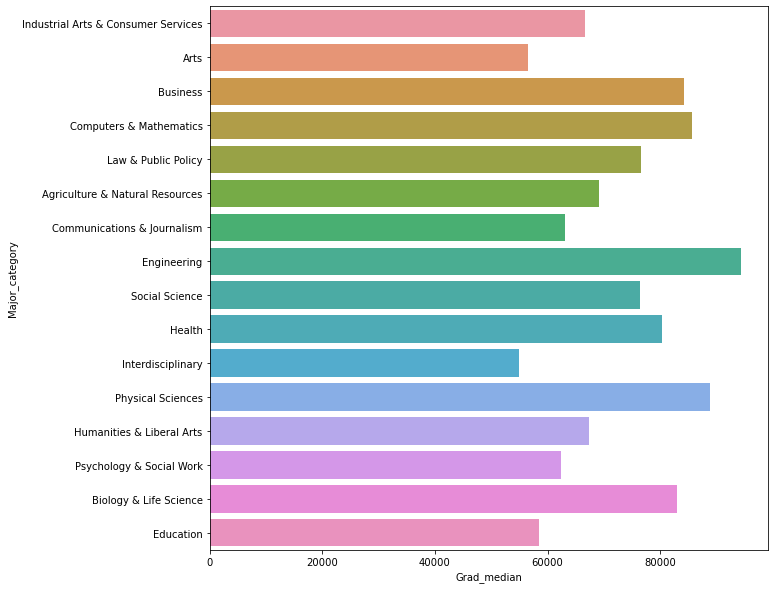

In [16]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'Grad_median', y = 'Major_category', data = grad_df, orient = 'h', ci = None)

<AxesSubplot:xlabel='Diff_median', ylabel='Major_category'>

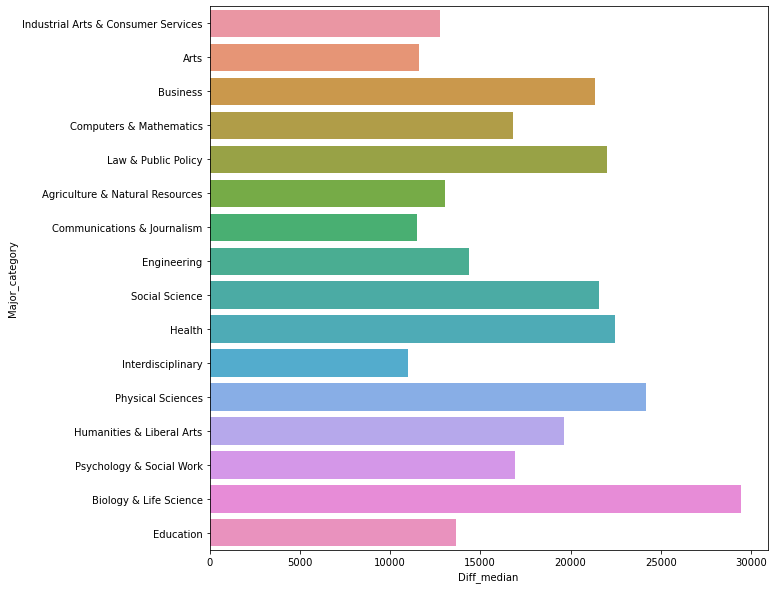

In [17]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'Diff_median', y = 'Major_category', data = grad_df, orient = 'h', ci = None)

In [18]:
health_df = grad_df[grad_df['Major_category'] == 'Health']

<AxesSubplot:xlabel='Diff_median', ylabel='Major'>

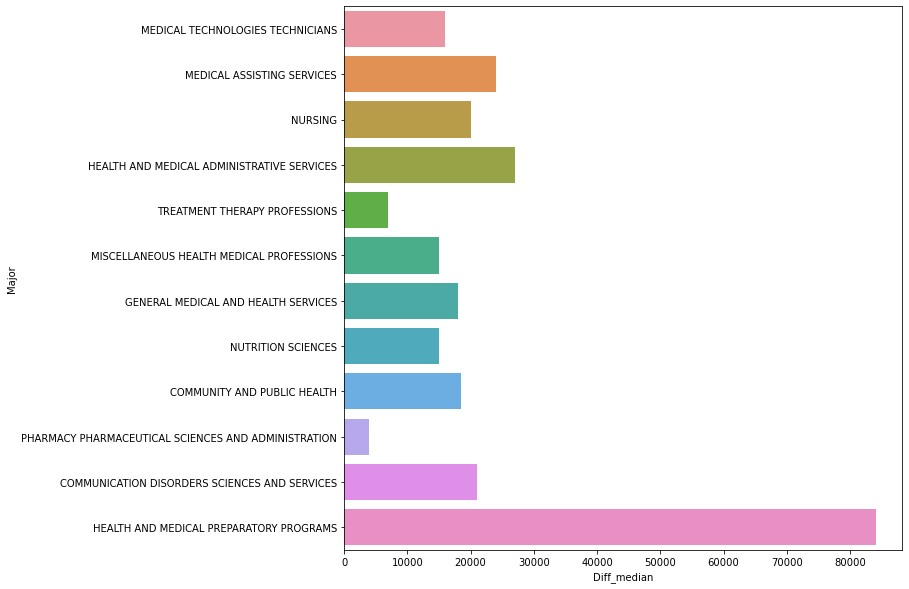

In [19]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'Diff_median', y = 'Major', data = health_df, orient = 'h', ci = None)

In [20]:
grad_salary = grad_df['Grad_median']
undergrad_salary = grad_df['Nongrad_median']

In [34]:
print('The average graduate salary is: $', grad_salary.mean().round(2))
print('The average undergraduate salary is: $', undergrad_salary.mean().round(2))
print('People with graduate degrees make $', grad_df['Diff_median'].mean().round(2),'more on avergae')

The average graduate salary is: $ 76755.78
The average undergraduate salary is: $ 58583.82
People with graduate degrees make $ 18171.97 more on avergae


In [21]:
stats.levene(grad_salary, undergrad_salary)

LeveneResult(statistic=6.066328082575512, pvalue=0.01426750876395218)

Text(0.5, 1.0, 'Graduate Salaries Q-Q Plot')

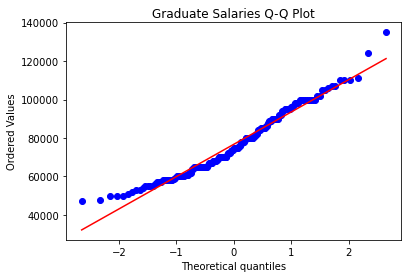

In [22]:
stats.probplot(grad_salary, dist="norm", plot= plt)
plt.title("Graduate Salaries Q-Q Plot")

Text(0.5, 1.0, 'Undergraduate Salary Q-Q Plot')

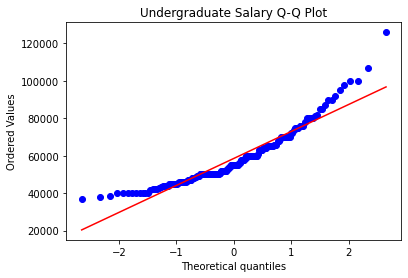

In [23]:
stats.probplot(undergrad_salary, dist="norm", plot= plt)
plt.title("Undergraduate Salary Q-Q Plot")

In [24]:
stats.ttest_ind(grad_salary, undergrad_salary, equal_var = False)

Ttest_indResult(statistic=10.564364778583695, pvalue=9.627903901685305e-23)

In [38]:
arts_df = grad_df[grad_df['Major_category'] == 'Arts']

In [35]:
health_grad_salary = health_df['Grad_median']
health_undergrad_salary = health_df['Nongrad_median']

In [42]:
stats.ttest_ind(health_grad_salary, health_undergrad_salary, equal_var = False)

Ttest_indResult(statistic=2.8349615595789395, pvalue=0.010024632233034252)

In [39]:
arts_grad_salary = arts_df['Grad_median']
arts_undergrad_salary = arts_df['Nongrad_median']

In [44]:
stats.ttest_ind(arts_grad_salary, arts_undergrad_salary, equal_var = False)

Ttest_indResult(statistic=6.293353040798194, pvalue=2.261763864579149e-05)